# Probability Mass Functions

- Goal of probability and uncertainty computations is to estimate population parameters from samples

## Bernoulli Trial

Bernoulli trial (or binomial trial): random experiment with 2 possible outcomes

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
rng = np.random.RandomState(123)

coin_flips = rng.randint(0, 2, size=1000)
heads = np.sum(coin_flips)
heads

520

In [3]:
tails = coin_flips.shape[0] - heads
tails

480

In [4]:
rng = np.random.RandomState(123)

for i in range(7):
    num = 10**i
    coin_flips = rng.randint(0, 2, size=num)
    heads_proba = np.mean(coin_flips)
    print('Heads probability: %.2f' % (heads_proba*100))

Heads probability: 0.00
Heads probability: 40.00
Heads probability: 47.00
Heads probability: 53.70
Heads probability: 49.53
Heads probability: 49.80
Heads probability: 50.03


- Do 100 coin flips 1000 times:

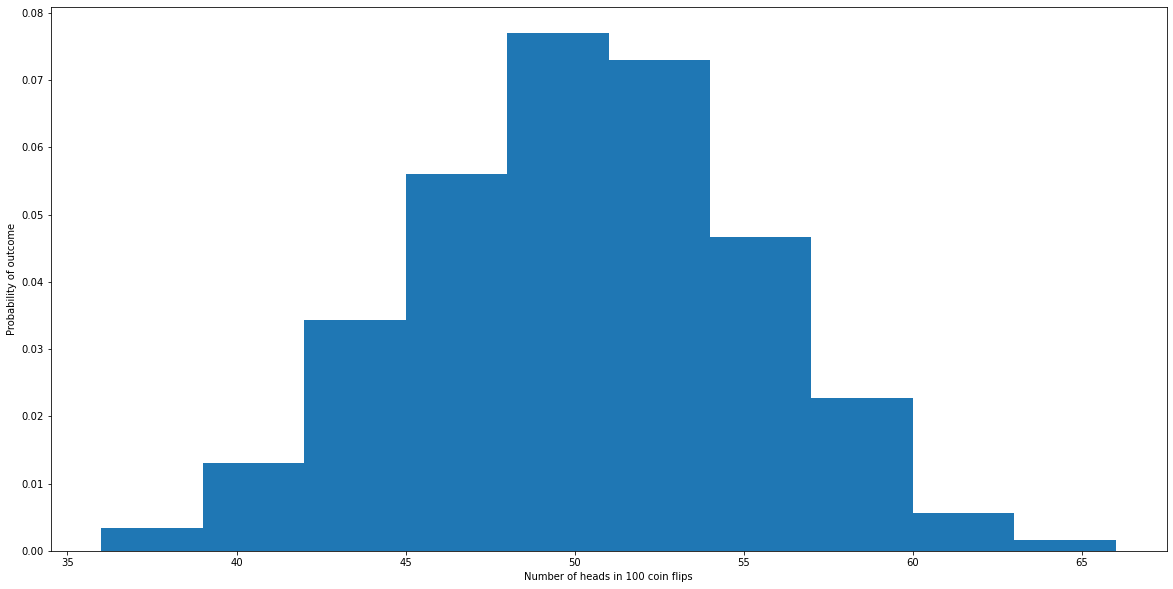

In [6]:
n_experiments = 1000
n_bernoulli_trials = 100

rng = np.random.RandomState(123)
outcomes = np.empty(n_experiments, dtype=np.float)

for i in range(n_experiments):
    num = 10**i
    coin_flips = rng.randint(0, 2, size=n_bernoulli_trials)
    head_counts = np.sum(coin_flips)
    outcomes[i] = head_counts

plt.figure(figsize=(20,10))
plt.hist(outcomes, density=True)
plt.xlabel('Number of heads in 100 coin flips')
plt.ylabel('Probability of outcome')
plt.show()

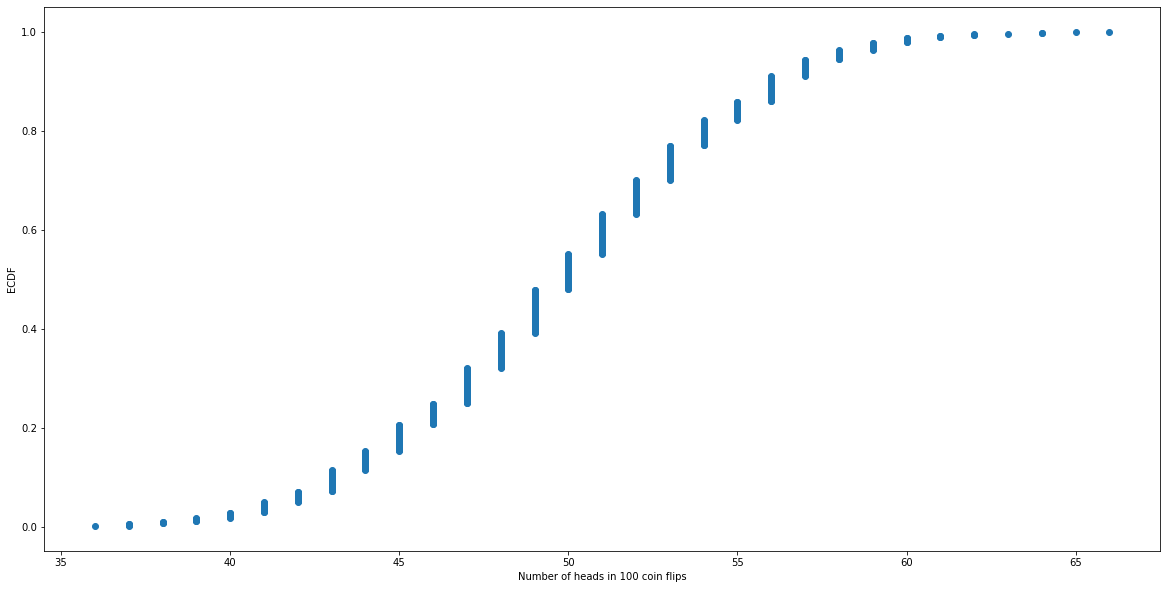

In [7]:
x = np.sort(outcomes)
y = np.arange(1, x.shape[0] + 1) / x.shape[0]

plt.figure(figsize=(20,10))
plt.plot(x, y, marker='o', linestyle='')
plt.ylabel('ECDF')
plt.xlabel('Number of heads in 100 coin flips')
plt.show()

- repeat with biased coin

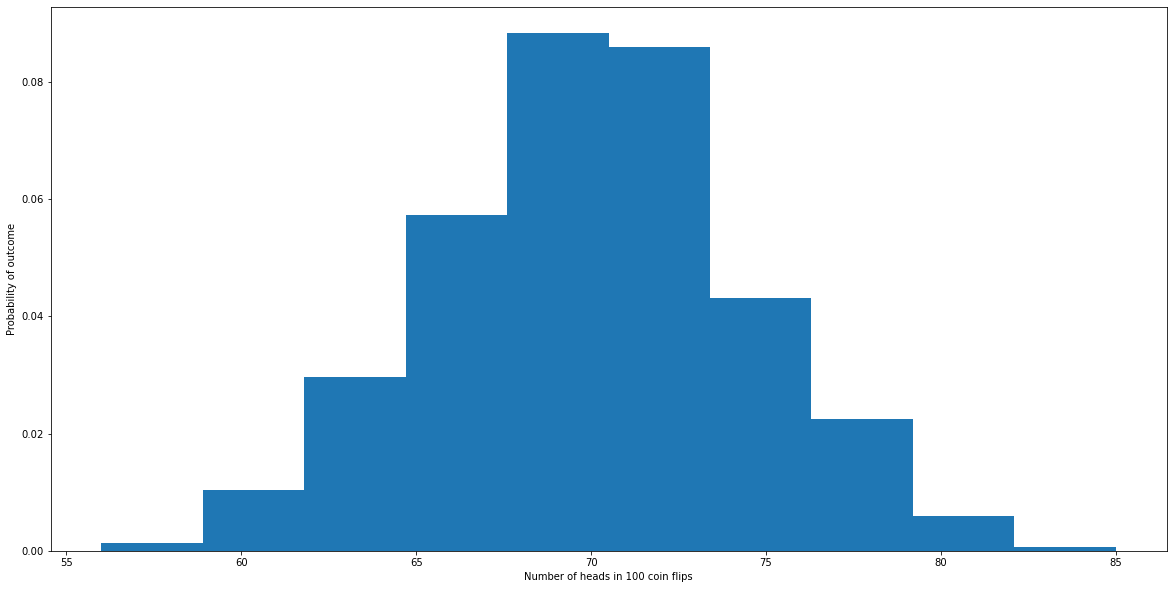

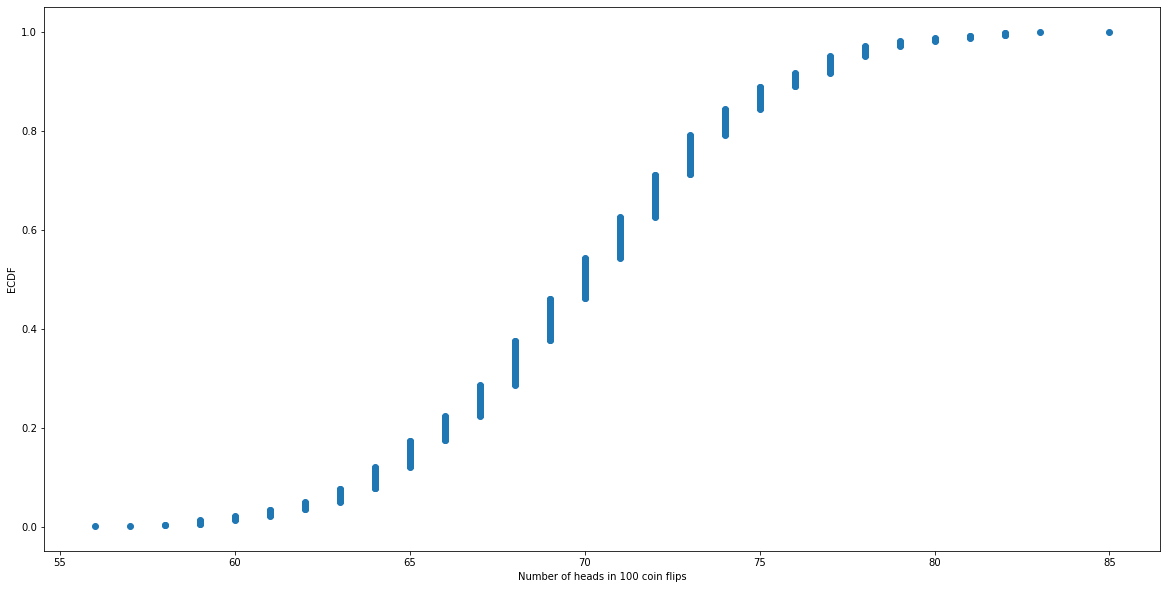

In [10]:
p = 0.7
n_experiments = 1000
n_bernoulli_trials = 100

rng = np.random.RandomState(123)
outcomes = np.empty(n_experiments, dtype=np.float)

for i in range(n_experiments):
    num = 10**i
    coin_flips = rng.rand(n_bernoulli_trials)
    head_counts = np.sum(coin_flips < p)
    outcomes[i] = head_counts

plt.figure(figsize=(20,10))
plt.hist(outcomes, density=True)
plt.xlabel('Number of heads in 100 coin flips')
plt.ylabel('Probability of outcome')
plt.show()


x = np.sort(outcomes)
y = np.arange(1, x.shape[0] + 1) / x.shape[0]

plt.figure(figsize=(20,10))
plt.plot(x, y, marker='o', linestyle='')
plt.ylabel('ECDF')
plt.xlabel('Number of heads in 100 coin flips')
plt.show()

## Binomial Distribution

- Bernoulli trial (or binomial trial): random experiment with 2 possible outcomes
- a binomial distribution describes a binomial variable $B(n, p)$ of 
*n* of Bernoulli trials (which are statistically independent); *p* is the probability of success (and *q* is the probability of failure, 1-*p*)
- Probability of *k* successes:

$$P(k) = \binom{n}{k} p^k q^{n-k}$$

where $\binom{n}{k}$ ("*n choose k*") is the binomial coefficient

$$\binom{n}{k} = \frac{n!}{k!(n-k)!}$$

- Compute probability of 500 heads in 1000 bernoulli trials flipping a fair coin:

In [14]:
def factorial(n):
    if n == 0:
        return 1
    else:
        return n * factorial(n-1)

def combin(n, k): # "n choose k*
    return factorial(n) / factorial(k) / factorial(n - k)    

In [15]:
p = 0.5 # probability of success
n = 100 # n_trials
k = 50 # k_successes 

proba = combin(n, k) * p**k * (1 - p)**(n - k)
proba

0.07958923738717877

In [16]:
rv = stats.binom(n, p)
rv.pmf(50)

0.07958923738717888

Remember, through simulation:

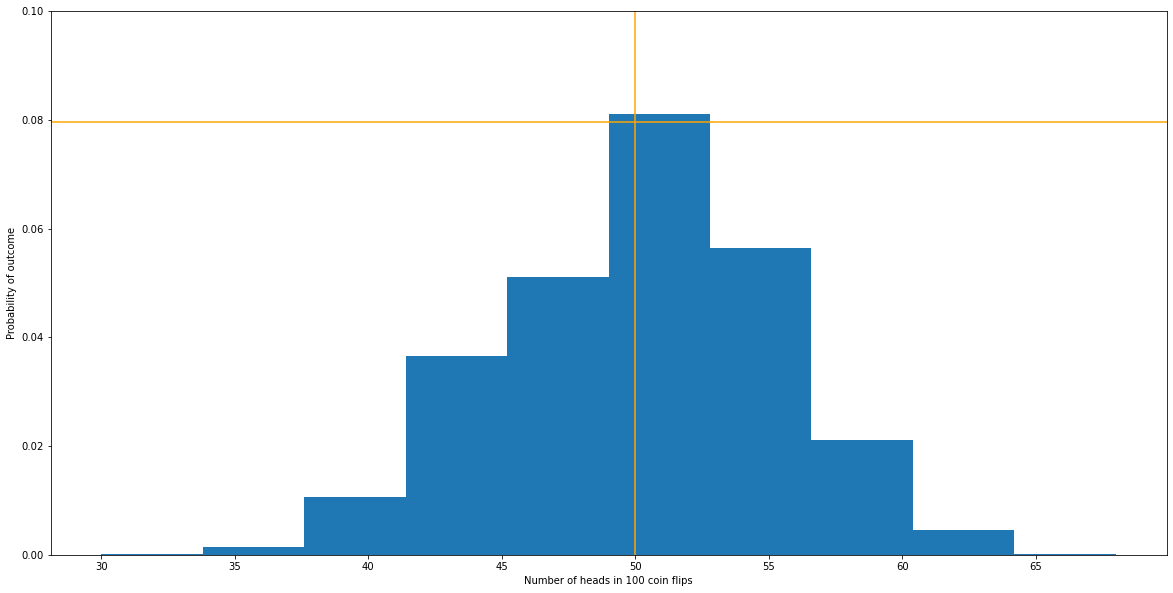

In [17]:
n_repetitions = 5000

rng = np.random.RandomState(123)
outcomes = np.empty(n_repetitions, dtype=np.float)

for i in range(n_repetitions):
    num = 10**i
    coin_flips = rng.randint(0, 2, size=n)
    head_counts = np.sum(coin_flips)
    outcomes[i] = head_counts

plt.figure(figsize=(20,10))
plt.hist(outcomes, density=True)
plt.xlabel('Number of heads in 100 coin flips')
plt.ylabel('Probability of outcome')
plt.axvline(50, color='orange')
plt.axhline(proba, color='orange')
plt.ylim([0, 0.1])
plt.show()

## Binomial Probability Mass Function (PMF)

- probabilities of discrete variables
- previous coin flip (histogram above) is a discrete uniform PMF (if coin is unbiased)

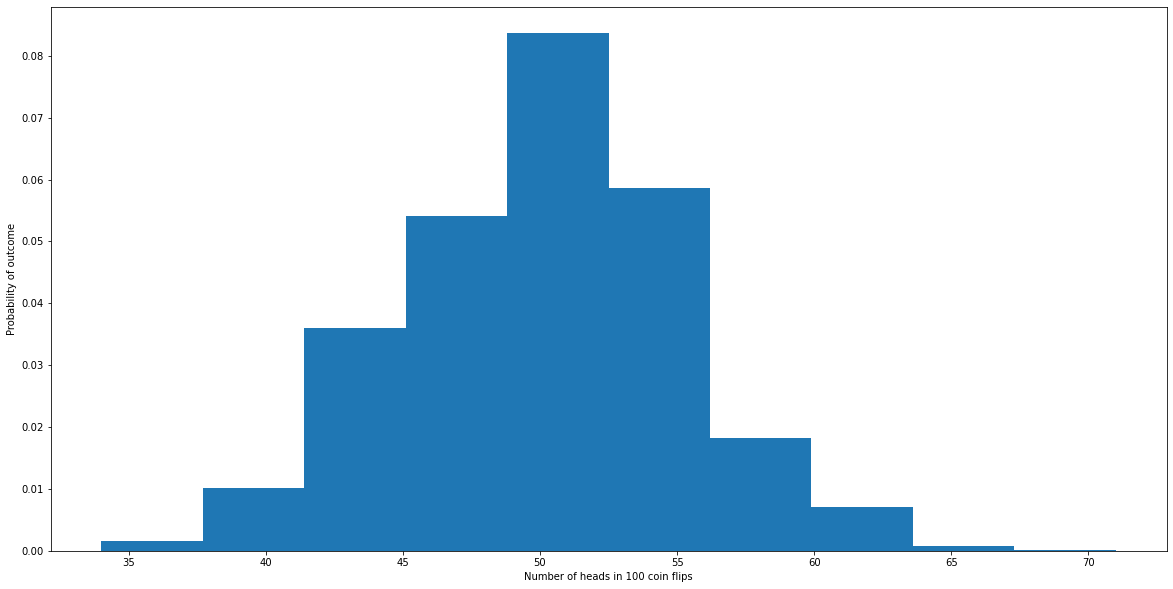

In [18]:
rng = np.random.RandomState(123)

p = 0.5
n = 100
outcomes = rng.binomial(n, p, size=10000)

plt.figure(figsize=(20,10))
plt.hist(outcomes, density=True)
plt.xlabel('Number of heads in 100 coin flips')
plt.ylabel('Probability of outcome')
plt.show()

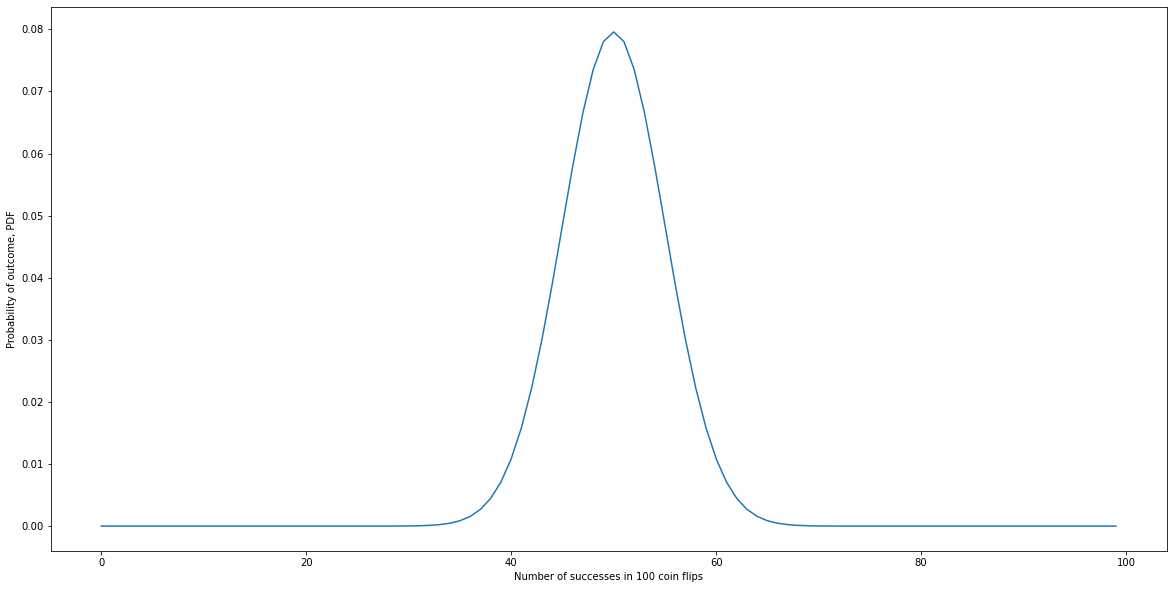

In [19]:
n = 100

probas = []
for k in range(n):
    probas.append(combin(n, k) * p**k * (1 - p)**(n - k))

    
plt.figure(figsize=(20,10))    
plt.plot(range(100), probas)
plt.xlabel('Number of successes in 100 coin flips')
plt.ylabel('Probability of outcome, PDF')
plt.show()

## Binomial Cumulative Distribution Function (CDF)

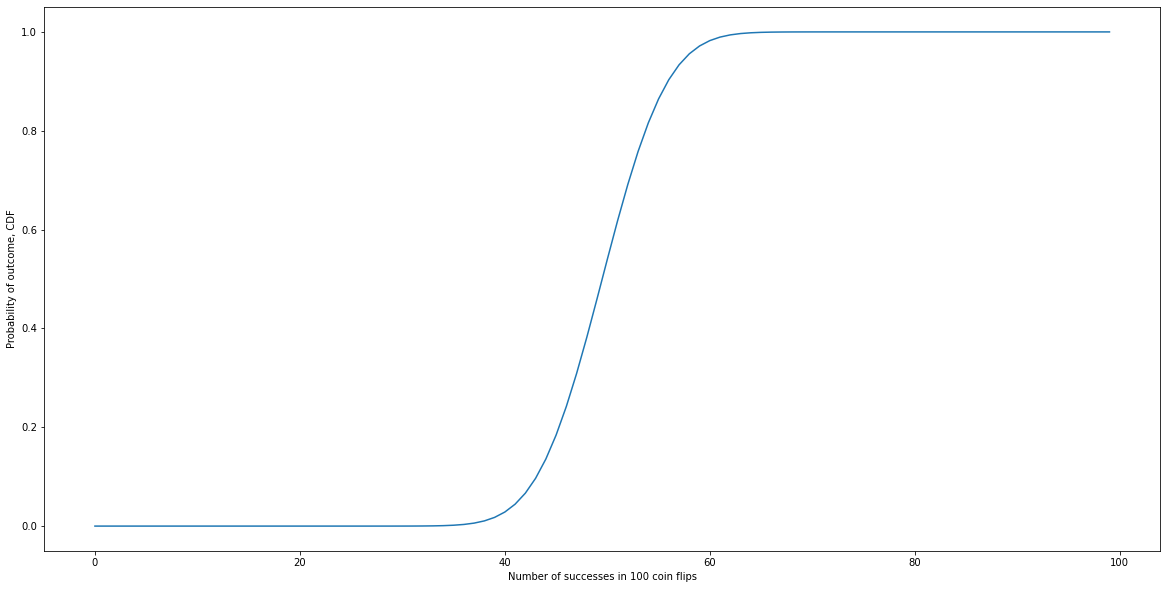

In [20]:
n = 100

probas = []
for k in range(n):
    probas.append(combin(n, k) * p**k * (1 - p)**(n - k))
    
plt.figure(figsize=(20,10))
plt.plot(range(100), np.cumsum(probas))
plt.xlabel('Number of successes in 100 coin flips')
plt.ylabel('Probability of outcome, CDF')
plt.show()

### Rolling a die

- Another discrete uniform PMF would be a dice rolls with a fair die

Text(0.5, 0, 'Die roll outcome')

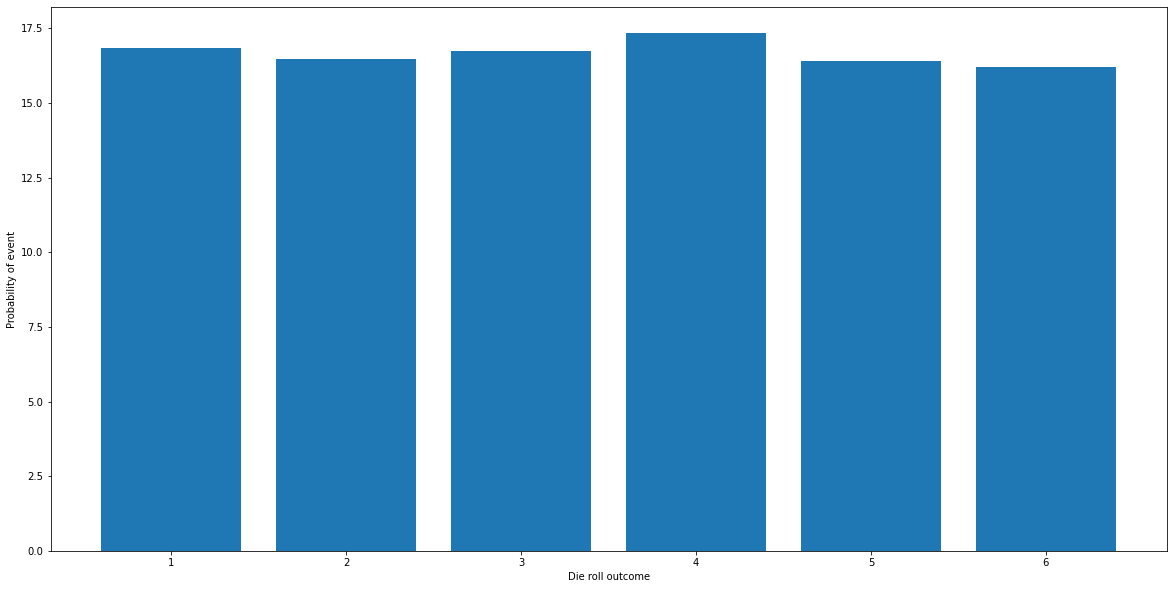

In [21]:
n = 10000
rng = np.random.RandomState(123)
dice_rolls = rng.randint(1, 7, n)

outcome_proba = np.bincount(dice_rolls)[1:] / n * 100 
plt.figure(figsize=(20,10))
plt.bar(range(1, 7), outcome_proba)
plt.ylabel('Probability of event')
plt.xlabel('Die roll outcome')

- A random variable that counts the number of a specific outcome, say rolling a 3, follows a binomial distribution

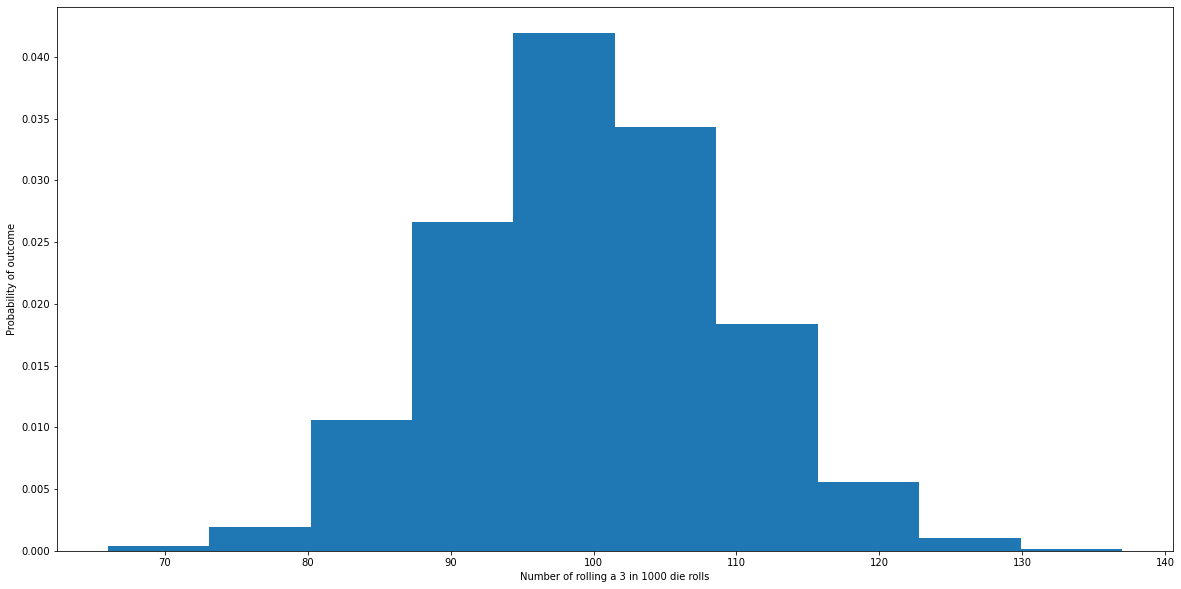

In [22]:
p = 0.1 # probability_rolling a 3
n = 1000 # number of die rolls

rng = np.random.RandomState(1)
outcomes = rng.binomial(n, p, size=5000)

plt.figure(figsize=(20,10))
plt.hist(outcomes, density=True)
plt.xlabel('Number of rolling a 3 in 1000 die rolls')
plt.ylabel('Probability of outcome')
plt.show()

## Poisson Distribution

- similar to binomial distribution but different ;)
    - binomial measures the number of successes based on discrete events (*k* successes in *n* trials
    - poisson is based on "continuous events", but note that it is still a discrete probability distribution
    
- in poisson, we have $np \rightarrow \lambda$, assuming that we have infinite events ($n \rightarrow \infty)$ so that the probability of a singular event is infinitely small ($p \rightarrow 0$)
- $\mathcal{Bin}(n, p) \approx \mathcal{Poisson}(np), \text{ for } n \rightarrow  \infty$
- in that sense, the poisson distribution approximates the binomial distribution for a rare number of events that happen in a large number of trials

$$P(k \text{ events in an interval}) = e^{-\lambda} \frac{\lambda^k}{k!}$$

where $\lambda$ is the average number of events per interval
- poisson distributions are used to model rare events with large *n* and small *p* (binomial distributions are also appropriate but poisson is easier to compute)

In [23]:
n = 100
k = 5
p = 0.01

binomial_proba = combin(n, k) * p**k * (1 - p)**(n - k)
binomial_proba

0.00289778712376148

In [24]:
lambda_ = n*p

poisson_proba = np.e**(-lambda_)*lambda_**k/factorial(k)
poisson_proba

0.0030656620097620196

In [25]:
rv = stats.poisson(mu=lambda_)
rv.pmf(k=k)

0.00306566200976202

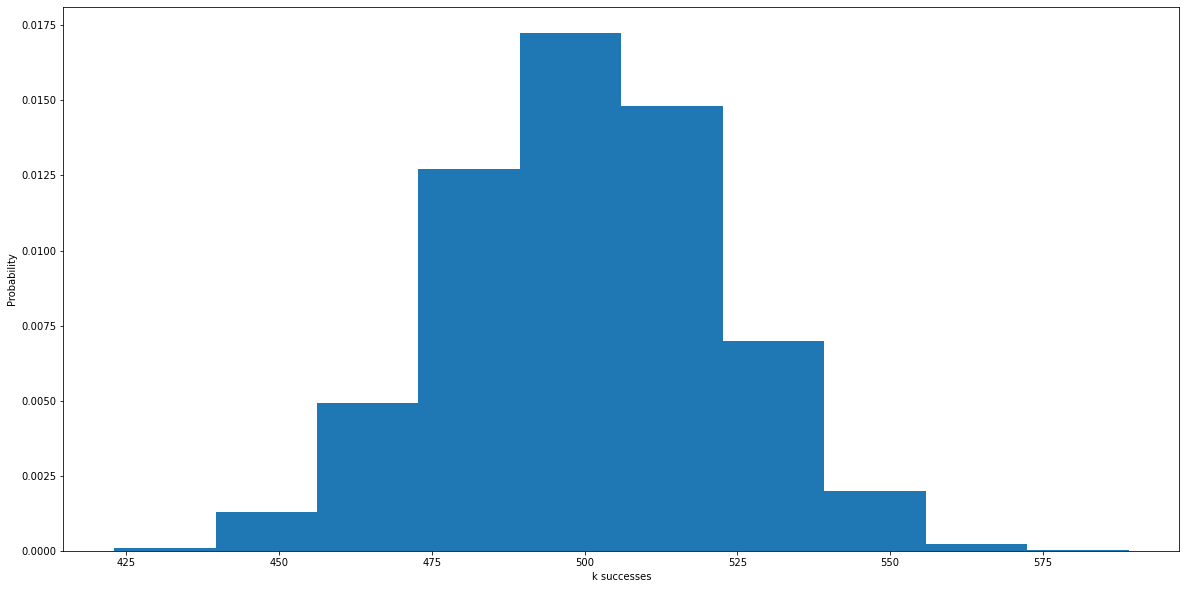

In [27]:
n = 10000
p = 0.05

rng = np.random.RandomState(123)
binomial_samples = rng.binomial(n, p, 5000)

plt.figure(figsize=(20,10))
plt.hist(binomial_samples, density=True)
plt.ylabel('Probability')
plt.xlabel('k successes')
plt.show()

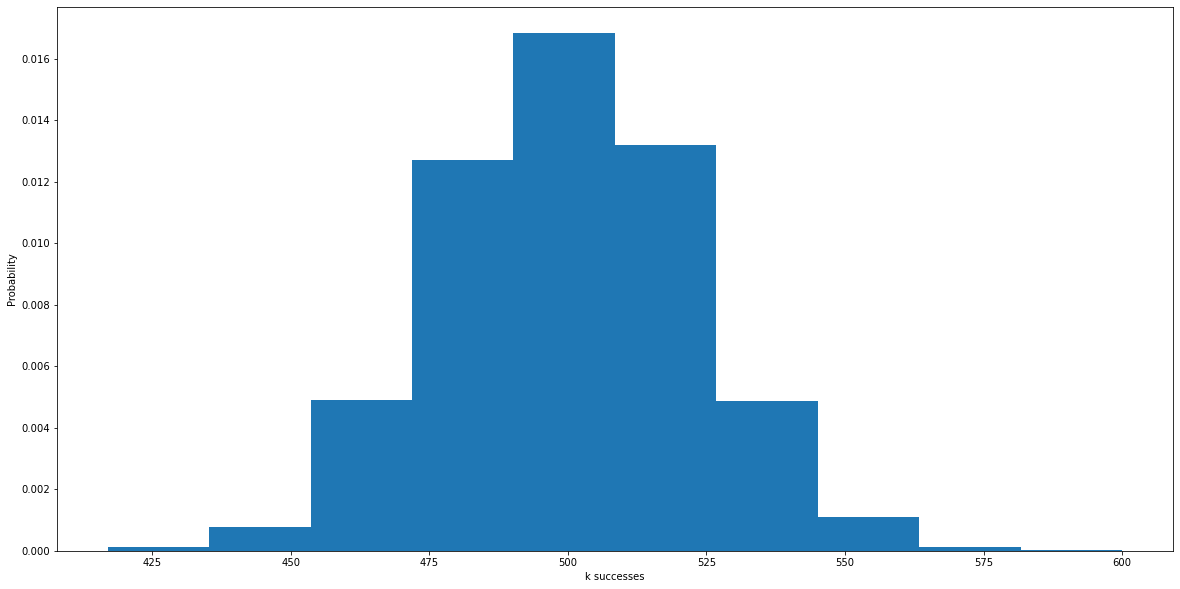

In [28]:
rng = np.random.RandomState(123)
poisson_samples = rng.poisson(n*p, 5000)

plt.figure(figsize=(20,10))
plt.hist(poisson_samples, density=True)
plt.ylabel('Probability')
plt.xlabel('k successes')
plt.show()

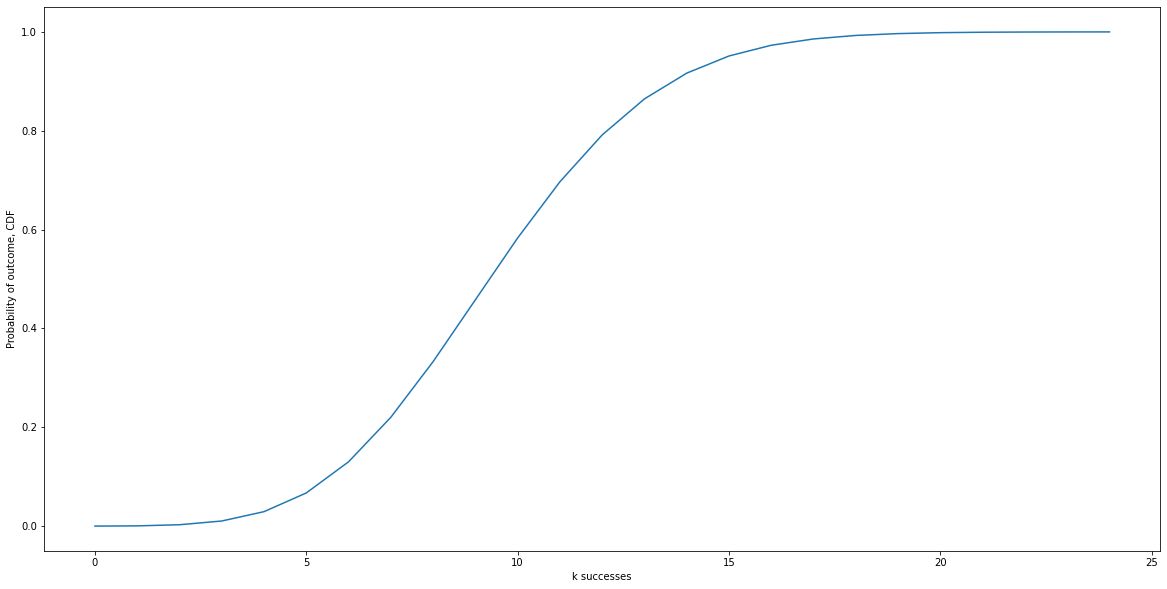

In [29]:
p = 0.1
n = 100
lambda_ = n*p

probas = []
for k in range(25):
    probas.append(np.e**(-lambda_)*lambda_**k/factorial(k))
    
plt.figure(figsize=(20,10))
plt.plot(range(25), np.cumsum(probas))
plt.xlabel('k successes')
plt.ylabel('Probability of outcome, CDF')
plt.show()